In [1]:
%cd ..

/Users/treycole/Codes/WanPy


In [2]:
from WanPy.pythtb_Wannier import *
import WanPy.models as models
import WanPy.plotting as plot

from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sympy as sp 
import scipy

In [3]:
delta = 1
t0 = 0.4
tprime = 0.5

model = models.chessboard(t0, tprime, delta).make_supercell([[2,0], [0,2]])

orbs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
lat_vecs = model.get_lat() # lattice vectors

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)

In [4]:
u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print("Chern number: ", chern)

Chern number:  -1.0000000000000002


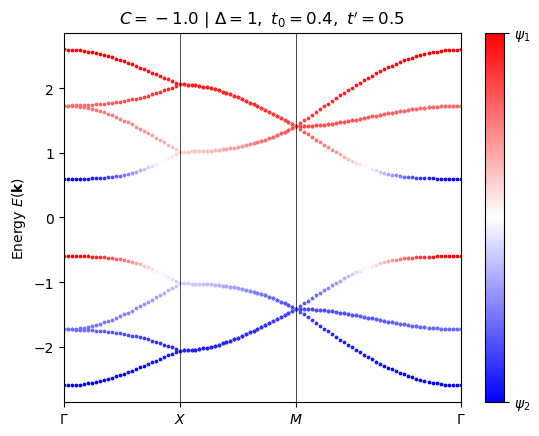

In [5]:
k_path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
k_label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$")

fig, ax = plot.plot_bands(
    model, k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

In [6]:
omit_sites = 4
tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site

([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

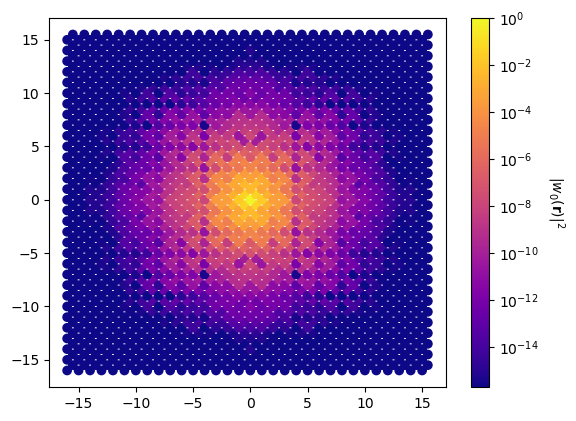

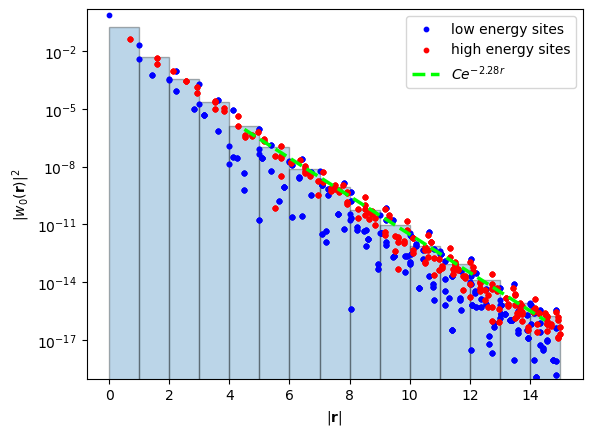

In [7]:
# 2D k-mesh
nkx = 16
nky = 16
Nk = nkx*nky

k_mesh = gen_k_mesh(nkx, nky, flat=False, endpoint=False)

u_wfs_Wan = wf_array(model, [nkx, nky])

for i in range(k_mesh.shape[0]):
    for j in range(k_mesh.shape[1]):
        u_wfs_Wan.solve_on_one_point(k_mesh[i,j], [i,j])

w0, psi_til_wan = Wannierize(model, u_wfs_Wan, tf_list, ret_psi_til=True)
u_tilde_wan = get_bloch_wfs(model, psi_til_wan, k_mesh, inverse=True)

plot.plot_Wan(w0, 0, orbs, lat_vecs, plot_decay=True)

In [8]:
M = k_overlap_mat(model, u_wfs_Wan) # [kx, ky, b, m, n]
spread, expc_rsq, expc_r_sq = spread_recip(model, M, decomp=True)

print(rf"Spread from M_kb of u_nk = {spread[0]}")
print(rf"Omega_I from M_kb of u_nk = {spread[1]}")
print(rf"Omega_til from M_kb of u_nk = {spread[2]}")

Spread from M_kb of u_nk = (1011.4811454344932+0j)
Omega_I from M_kb of u_nk = -1.3974932322469158e-14
Omega_til from M_kb of u_nk = (1011.4811454344907+0j)


In [9]:
M = k_overlap_mat(model, u_tilde_wan) # [kx, ky, b, m, n]
spread, expc_rsq, expc_r_sq = spread_recip(model, M, decomp=True)

print(rf"Spread from M_kb of \tilde{{u_nk}} = {spread[0]}")
print(rf"Omega_I from M_kb of \tilde{{u_nk}} = {spread[1]}")
print(rf"Omega_til from M_kb of \tilde{{u_nk}} = {spread[2]}")

Spread from M_kb of \tilde{u_nk} = (0.8461633960951493+0j)
Omega_I from M_kb of \tilde{u_nk} = 0.7542011847776017
Omega_til from M_kb of \tilde{u_nk} = (0.09196221131753471+0j)


In [13]:
# spread, expc_rsq, expc_r_sq = spread_real(w0, orbs, lat_vecs, decomp=True)

# print(rf"Spread from w0 = {spread[0]}")
# print(rf"Omega_I from w0 = {spread[1]}")
# print(rf"Omega_tilde from w0 = {spread[2]}")

In [11]:
outer_states = u_wfs_Wan._wfs[..., :n_occ, :]
util_min_Wan = find_optimal_subspace(
    model, outer_states, u_tilde_wan, iter_num=3000, print_=True)

0 Omega_I: 78.19051933852954
1 Omega_I: 1.429297801543418
2 Omega_I: 0.7565582177634868
3 Omega_I: 0.7906845350320626
4 Omega_I: 0.7576156495331096
5 Omega_I: 0.7497332112352671
6 Omega_I: 0.7456588442469121
7 Omega_I: 0.7486079714089131
8 Omega_I: 0.7417211377551347
9 Omega_I: 0.7408304345835235
10 Omega_I: 0.7417020174486776
11 Omega_I: 0.7379441790069434
12 Omega_I: 0.7368364037165922
13 Omega_I: 0.7371938070946873
14 Omega_I: 0.7345374432578546
15 Omega_I: 0.7334702047081478
16 Omega_I: 0.7335027955863718
17 Omega_I: 0.7314445120150175
18 Omega_I: 0.7304267970356165
19 Omega_I: 0.7302841398962187
20 Omega_I: 0.7285845015665421
21 Omega_I: 0.727627061185721
22 Omega_I: 0.7273828645983782
23 Omega_I: 0.7259246579971904
24 Omega_I: 0.725028121539037
25 Omega_I: 0.7247248590821832
26 Omega_I: 0.7234425894936869
27 Omega_I: 0.7226044031397256
28 Omega_I: 0.7222678587168325
29 Omega_I: 0.7211215967226594
30 Omega_I: 0.7203380873948082
31 Omega_I: 0.719984679673525
32 Omega_I: 0.718948185

In [13]:
M = k_overlap_mat(model, util_min_Wan) # [kx, ky, b, m, n]
spread, expc_rsq, expc_r_sq = spread_recip(model, M, decomp=True)

print(rf"Spread from M_kb of \tilde{{u_nk}}_{{min}} = {spread[0]}")
print(rf"Omega_I from M_kb of \tilde{{u_nk}}_{{min}} = {spread[1]}")
print(rf"Omega_til from M_kb \tilde{{u_nk}}_{{min}} = {spread[2]}")

Spread from M_kb of \tilde{u_nk}_{min} = (404.548101211248+0j)
Omega_I from M_kb of \tilde{u_nk}_{min} = 0.6841938666494766
Omega_til from M_kb \tilde{u_nk}_{min} = (403.86390734459377+0j)


In [16]:
# eigvals_min, evecs_min = diag_h_in_subspace(model, util_min_path, k_vec, ret_evecs=True)

# fig, ax = plot.plot_bands(
#     model, k_path, evals=eigvals_min, evecs=evecs_min, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

# # continuous bands
# for n in range(evals.shape[0]):
#     ax.plot(k_dist, evals[n], c='k', lw=1.5, zorder=0)

In [16]:
psi_til_min = get_bloch_wfs(model, util_min_Wan, k_mesh)
state_idx = list(range(psi_til_min.shape[2]))
psi_til_til_min = get_psi_tilde(psi_til_min, tf_list, state_idx=state_idx)
u_til_til_min = get_bloch_wfs(model, psi_til_til_min, k_mesh, inverse=True)

M = k_overlap_mat(model, u_til_til_min) # [kx, ky, b, m, n]
spread, expc_rsq, expc_r_sq = spread_recip(model, M, decomp=True)

print(rf"Spread from M_kb of \tilde\tilde{{u_nk}}_{{min}} = {spread[0]}")
print(rf"Omega_I from M_kb of \tilde\tilde{{u_nk}}_{{min}} = {spread[1]}")
print(rf"Omega_til from M_kb of \tilde\tilde{{u_nk}}_{{min}} = {spread[2]}")

Spread from M_kb of \tilde\tilde{u_nk}_{min} = (0.7233799571900184+0j)
Omega_I from M_kb of \tilde\tilde{u_nk}_{min} = 0.68419386664947
Omega_til from M_kb of \tilde\tilde{u_nk}_{min} = (0.039186090540546045+0j)


In [24]:
U, M = find_min_unitary(model, M, iter_num=500, eps=2e-3, print_=True)

0 Omega_til = 0.036585363029827726, Grad mag: 3.540352397993656e-05
1 Omega_til = 0.03658536302982728, Grad mag: 3.525842912156218e-05
2 Omega_til = 0.03658536302982758, Grad mag: 3.512837892369052e-05
3 Omega_til = 0.0365853630298277, Grad mag: 3.4998808400392355e-05
4 Omega_til = 0.03658536302982723, Grad mag: 3.4882625052616954e-05
5 Omega_til = 0.036585363029827234, Grad mag: 3.4778407153911014e-05
6 Omega_til = 0.0365853630298276, Grad mag: 3.467450062174128e-05
7 Omega_til = 0.03658536302982736, Grad mag: 3.45812641280823e-05
8 Omega_til = 0.036585363029827365, Grad mag: 3.4497576918543854e-05
9 Omega_til = 0.03658536302982712, Grad mag: 3.4414092229356096e-05
10 Omega_til = 0.036585363029827046, Grad mag: 3.433913784185659e-05
11 Omega_til = 0.03658536302982708, Grad mag: 3.426434669841216e-05
12 Omega_til = 0.03658536302982708, Grad mag: 3.418971845048758e-05
13 Omega_til = 0.03658536302982704, Grad mag: 3.412269931154091e-05
14 Omega_til = 0.036585363029826935, Grad mag: 3.405

In [23]:
u_min = np.zeros(u_til_til_min.shape, dtype=complex)
for kx in range(nkx):
    for ky in range(nky):
        for i in range(u_min.shape[2]):
            for j in range(u_min.shape[2]):
                u_min[kx, ky, i, :] += U[kx, ky, j, i] * u_til_til_min[kx, ky, j] 

psi_min = get_bloch_wfs(model, u_min, k_mesh, inverse=False)

M = k_overlap_mat(model, u_min) # [kx, ky, b, m, n]
spread, expc_rsq, expc_r_sq = spread_recip(model, M, decomp=True)

print(rf"Spread from M_kb of \tilde{{u_nk}} = {spread[0]}")
print(rf"Omega_I from M_kb of \tilde{{u_nk}} = {spread[1]}")
print(rf"Omega_til from M_kb of \tilde{{u_nk}} = {spread[2]}")

Spread from M_kb of \tilde{u_nk} = (0.7207792296775062+0j)
Omega_I from M_kb of \tilde{u_nk} = 0.6841938666476792
Omega_til from M_kb of \tilde{u_nk} = (0.03658536302982763+0j)


([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

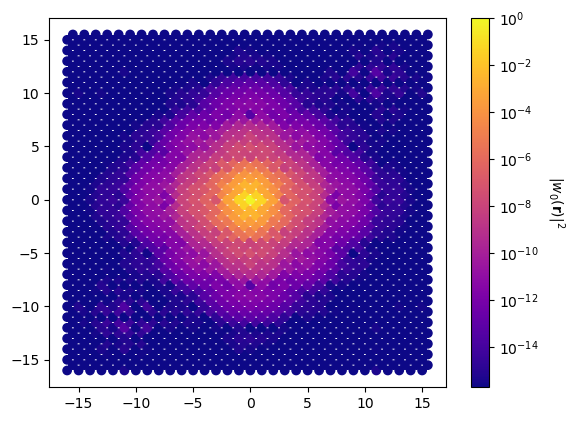

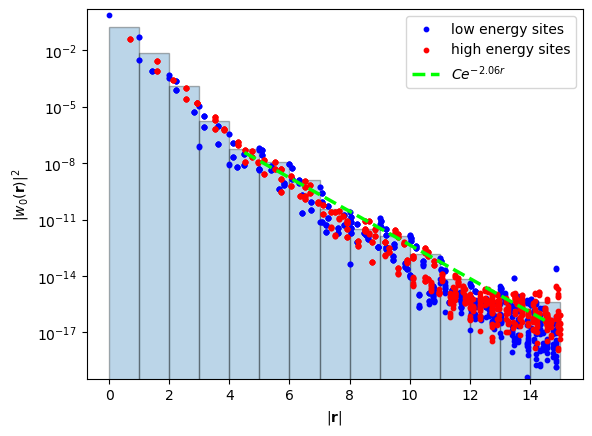

In [20]:
# dim_k = len(psi_til_til_min.shape[:-2])
# w0 = np.fft.ifftn(psi_til_til_min, axes = [i for i in range(dim_k)])
w0 = DFT(psi_min)
plot.plot_Wan(w0, 0, orbs, lat_vecs, plot_decay=True)

spread, expc_rsq, expc_r_sq = spread_real(model, w0, decomp=True)
print(rf"Omega_I from w0 = {spread[1]}")
print(rf"Omega_tilde from w0 = {spread[2]}")